In [1]:
# import pandas
import pandas as pd

# load bitcoin dataset
bitcoin_df = pd.read_csv('BTC-USD (3).csv')
bitcoin_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [2]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1703 non-null   object 
 1   Open       1703 non-null   float64
 2   High       1703 non-null   float64
 3   Low        1703 non-null   float64
 4   Close      1703 non-null   float64
 5   Adj Close  1703 non-null   float64
 6   Volume     1703 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 93.3+ KB


In [3]:
# change the date to non-null datetime and set it as index
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'], infer_datetime_format=True)
bitcoin_df.set_index('Date', inplace=True)
bitcoin_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-26,21596.085938,21804.908203,20199.482422,20260.019531,20260.019531,42326789564
2022-08-27,20262.480469,20340.775391,19890.523438,20041.738281,20041.738281,30116729776
2022-08-28,20041.035156,20139.054688,19616.814453,19616.814453,19616.814453,24366810591
2022-08-29,19615.154297,20357.462891,19600.785156,20297.994141,20297.994141,32637854078
2022-08-30,20298.611328,20542.644531,19617.640625,19796.808594,19796.808594,34483360283


In [4]:
# detect missing values
bitcoin_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
bitcoin_df = bitcoin_df.loc[:, ['Close']]
bitcoin_df.tail()

,Close
Date,
2022-08-26,20260.019531
2022-08-27,20041.738281
2022-08-28,19616.814453
2022-08-29,20297.994141
2022-08-30,19796.808594


In [6]:
ethereum_df = pd.read_csv('ETH-USD (2).csv')
ethereum_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
1,2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2,2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
3,2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
4,2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824


In [7]:
ethereum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1703 non-null   object 
 1   Open       1703 non-null   float64
 2   High       1703 non-null   float64
 3   Low        1703 non-null   float64
 4   Close      1703 non-null   float64
 5   Adj Close  1703 non-null   float64
 6   Volume     1703 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 93.3+ KB


In [8]:
ethereum_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
ethereum_df['Date'] = pd.to_datetime(ethereum_df['Date'], infer_datetime_format=True)
ethereum_df.set_index('Date', inplace=True)
ethereum_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-26,1696.324585,1698.561035,1498.771240,1507.782837,1507.782837,26713710143
2022-08-27,1508.156982,1517.150024,1454.282959,1491.395020,1491.395020,18120831899
2022-08-28,1491.206787,1505.791992,1430.547363,1430.547363,1430.547363,12823572918
2022-08-29,1430.439453,1556.309570,1427.728394,1553.037354,1553.037354,17965837488
2022-08-30,1553.188965,1600.461182,1480.831787,1523.838867,1523.838867,21835784470


In [10]:
ethereum_df = ethereum_df.loc[:, ['Close']]
ethereum_df.tail()

,Close
Date,
2022-08-26,1507.782837
2022-08-27,1491.395020
2022-08-28,1430.547363
2022-08-29,1553.037354
2022-08-30,1523.838867


In [11]:
joined_df = bitcoin_df.join(ethereum_df, how='outer', rsuffix=' Ethereum')
joined_df.dropna(inplace=True)
joined_df

,Close,Close Ethereum
Date,,
2018-01-01,13657.200195,772.640991
2018-01-02,14982.099609,884.443970
2018-01-03,15201.000000,962.719971
2018-01-04,15599.200195,980.921997
2018-01-05,17429.500000,997.719971
...,...,...
2022-08-26,20260.019531,1507.782837
2022-08-27,20041.738281,1491.395020
2022-08-28,19616.814453,1430.547363


In [12]:
df = joined_df.rename(columns={"Close" : "Close Bitcoin"})
df

,Close Bitcoin,Close Ethereum
Date,,
2018-01-01,13657.200195,772.640991
2018-01-02,14982.099609,884.443970
2018-01-03,15201.000000,962.719971
2018-01-04,15599.200195,980.921997
2018-01-05,17429.500000,997.719971
...,...,...
2022-08-26,20260.019531,1507.782837
2022-08-27,20041.738281,1491.395020
2022-08-28,19616.814453,1430.547363


In [13]:
df.isnull().sum()

Close Bitcoin     0
Close Ethereum    0
dtype: int64

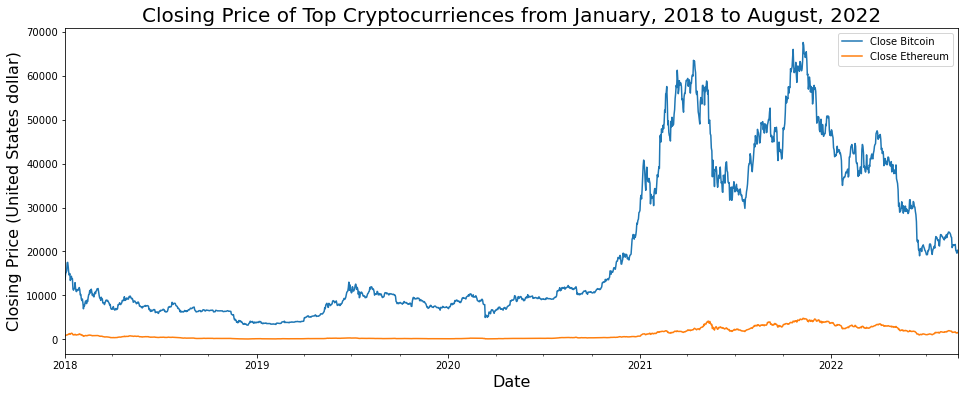

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = df.plot(figsize=(16,6))
ax.set_ylabel('Closing Price (United States dollar)', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_title('Closing Price of Top Cryptocurriences from January, 2018 to August, 2022', fontsize=20)
plt.show;

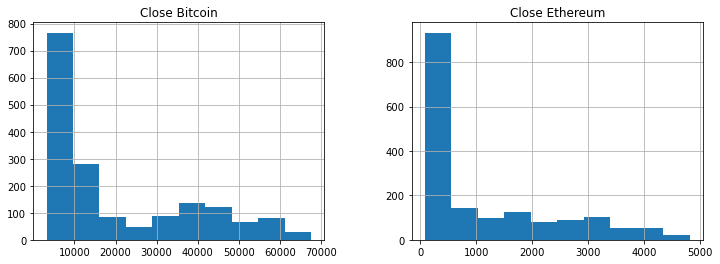

In [15]:
df.hist(figsize=(12,4));

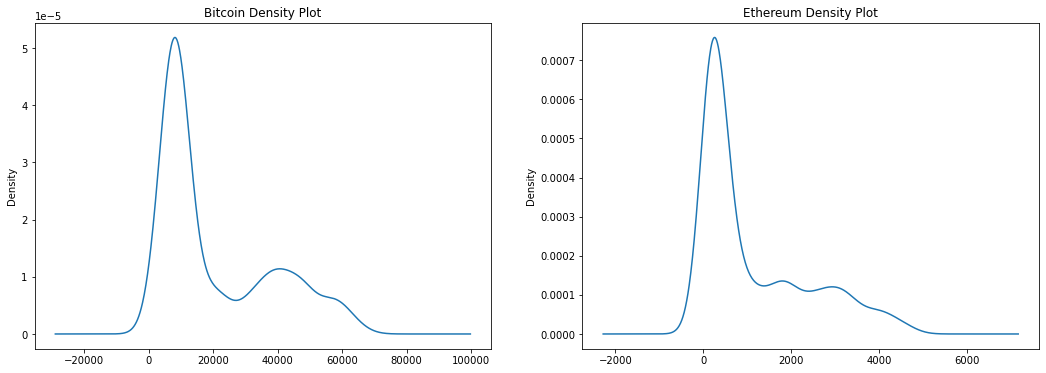

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18,6))
df['Close Bitcoin'].plot(kind='kde', ax=axes[0])
axes[0].set_title('Bitcoin Density Plot')
df['Close Ethereum'].plot(kind='kde', ax=axes[1])
axes[1].set_title('Ethereum Density Plot');

there are outliers in your data, then that may be the reason that the data is not normally distributed. these outliers have a chance of recurring in the future then it would not be appropriate to just blindly delete them from analysis. We need to look for other ways of handling this data.

In [17]:
# Normalize the data
first_value_bitcoin = df['Close Bitcoin'].iloc[0]
first_value_ethereum = df['Close Ethereum'].iloc[0]
bitcoin_normalized = df['Close Bitcoin'].div(first_value_bitcoin).mul(100)
ethereum_normalized = df['Close Ethereum'].div(first_value_ethereum).mul(100)

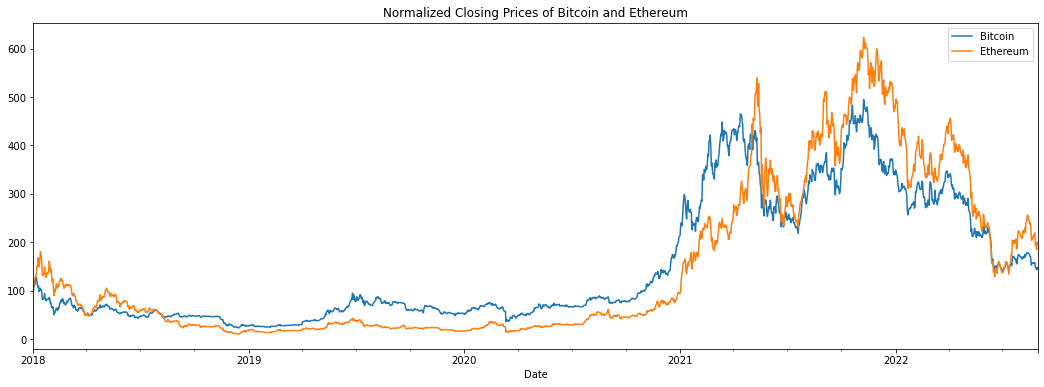

In [18]:
fig, ax = plt.subplots(figsize=(18,6))
bitcoin_normalized.plot()
ethereum_normalized.plot()
plt.legend(['Bitcoin','Ethereum'])
plt.title('Normalized Closing Prices of Bitcoin and Ethereum')
plt.show();

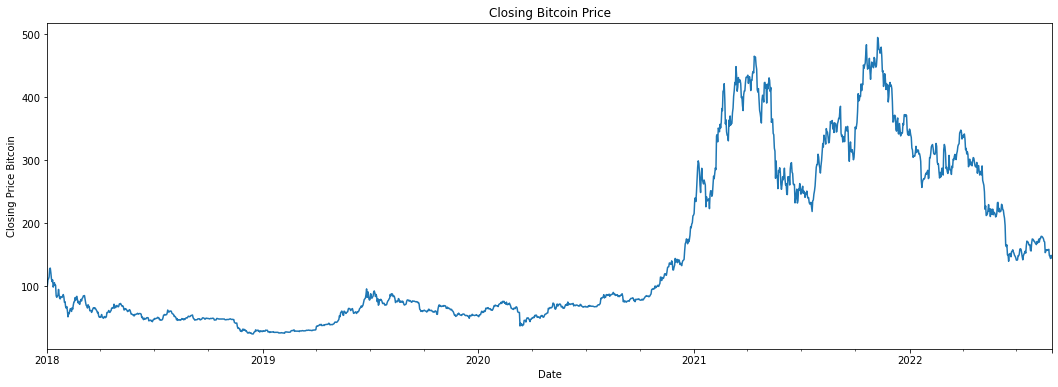

In [19]:
bitcoin_normalized.plot(figsize=(18,6))
plt.xlabel('Date')
plt.ylabel('Closing Price Bitcoin')
plt.title('Closing Bitcoin Price');

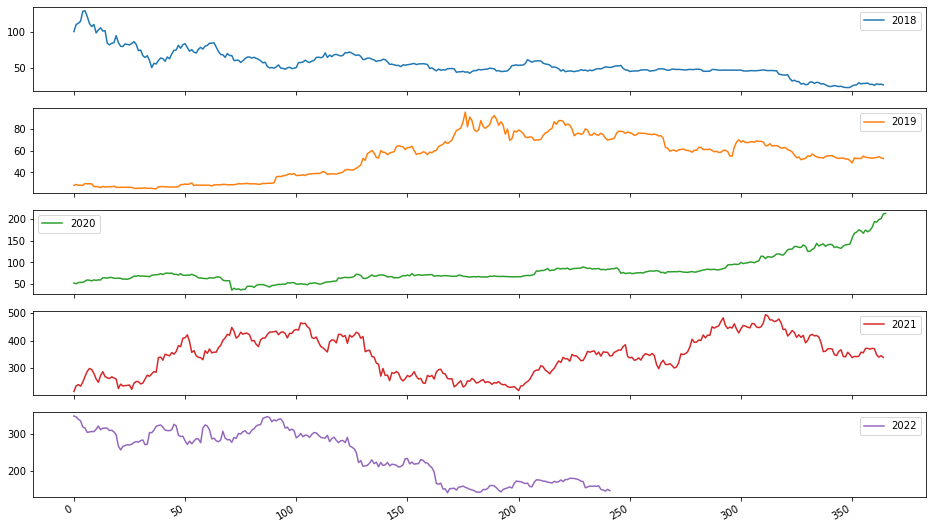

In [20]:
groups_yearly = bitcoin_normalized.groupby(pd.Grouper(freq='A'))
year_bitcoin = pd.concat([pd.DataFrame(x[1].values) for x in groups_yearly], axis=1)
year_df_bitcoin = pd.DataFrame(year_bitcoin)
year_df_bitcoin.columns = ['2018', '2019', '2020', '2021', '2022']
year_df_bitcoin.plot(figsize=(16,10), subplots=True, legend=True);

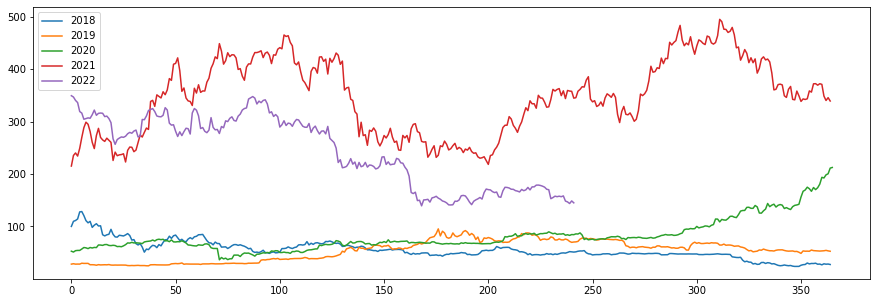

In [21]:
year_df_bitcoin.plot(figsize = (15,5), subplots=False, legend=True);

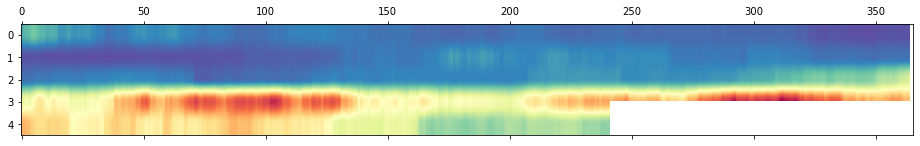

In [22]:
year_matrix = year_df_bitcoin.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

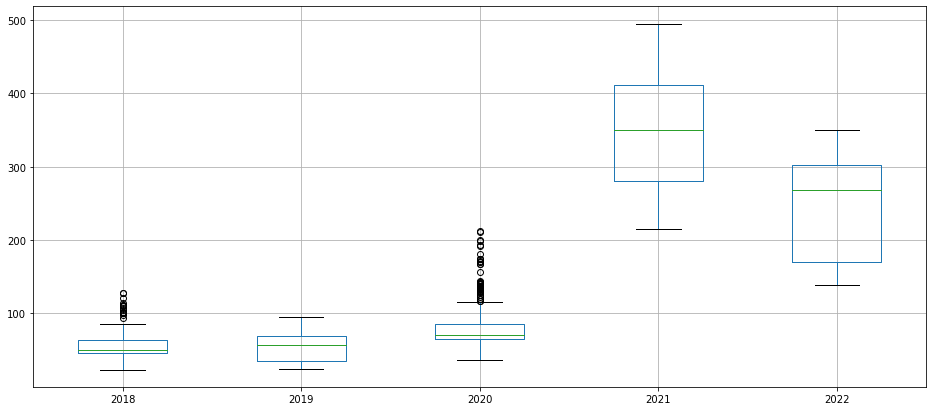

In [23]:
year_df_bitcoin.boxplot(figsize=(16,7));

In [24]:
cutoff_bitcoin = round(bitcoin_normalized.shape[0]*0.8)
cutoff_bitcoin

1362

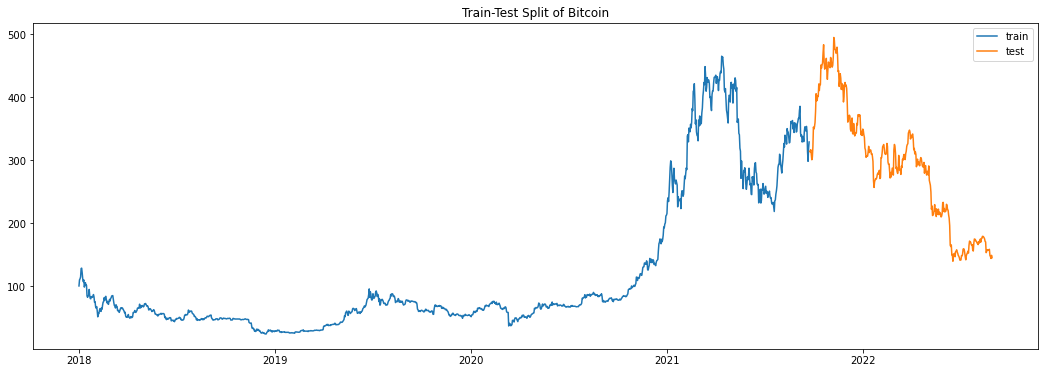

In [25]:
train_bitcoin = bitcoin_normalized[:cutoff_bitcoin]
test_bitcoin = bitcoin_normalized[cutoff_bitcoin:]
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(train_bitcoin, label='train')
ax.plot(test_bitcoin, label='test')
ax.set_title('Train-Test Split of Bitcoin')
plt.legend();

In [26]:
from sklearn.model_selection import TimeSeriesSplit
split = TimeSeriesSplit()
for train_ind, val_ind in split.split(train_bitcoin):
    print(train_ind, val_ind)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226] [227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 

Baseline Model

Baseline model can be built with the help of shift operator. The prediction for the next day is the original series shifted to the future.

In [27]:
train_bitcoin

Date
2018-01-01    100.000000
2018-01-02    109.701106
2018-01-03    111.303926
2018-01-04    114.219606
2018-01-05    127.621326
                 ...    
2021-09-19    346.046174
2021-09-20    313.708521
2021-09-21    297.964994
2021-09-22    319.058864
2021-09-23    328.728414
Name: Close Bitcoin, Length: 1362, dtype: float64

In [28]:
train_bitcoin.isna().sum()

0

In [29]:
naive = train_bitcoin.shift(1)
naive = naive.dropna()
naive

Date
2018-01-02    100.000000
2018-01-03    109.701106
2018-01-04    111.303926
2018-01-05    114.219606
2018-01-06    127.621326
                 ...    
2021-09-19    353.501176
2021-09-20    346.046174
2021-09-21    313.708521
2021-09-22    297.964994
2021-09-23    319.058864
Name: Close Bitcoin, Length: 1361, dtype: float64

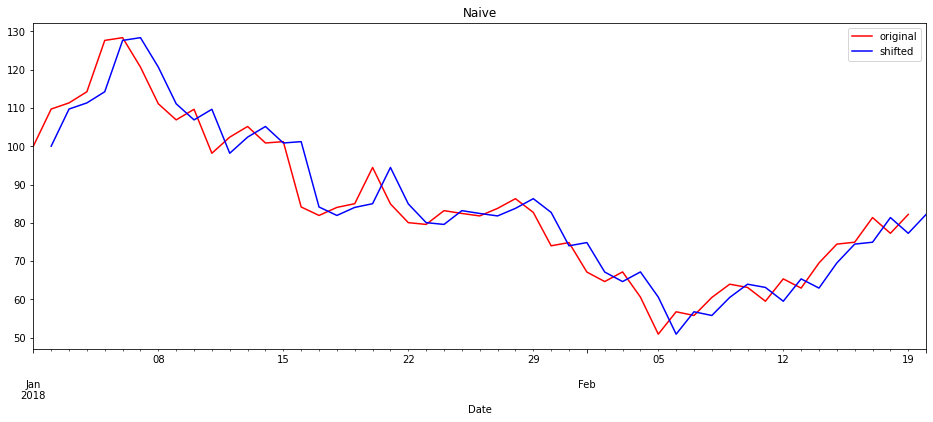

In [30]:
fig, ax = plt.subplots(figsize=(16,6))
train_bitcoin[0:50].plot(ax=ax, c='r', label='original')
naive[0:50].plot(ax=ax, c='b', label='shifted')
ax.set_title('Naive')
ax.legend();

In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(train_bitcoin[1:], naive.dropna()))

6.757759718755529

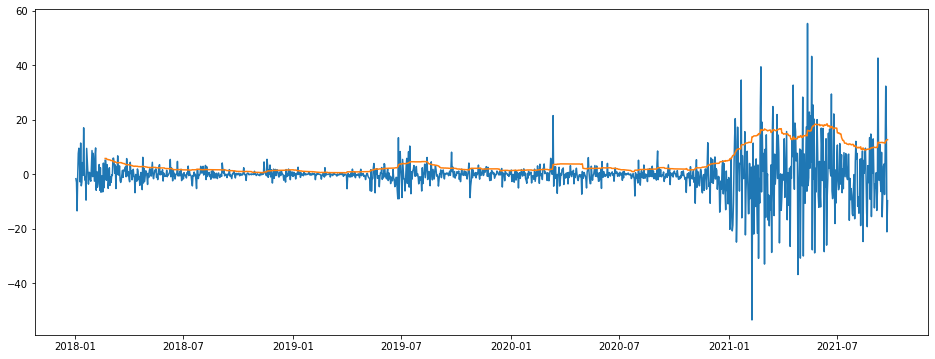

In [32]:
fig, ax = plt.subplots(figsize=(16,6))
residuals = naive[1:] - train_bitcoin[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(50).std());

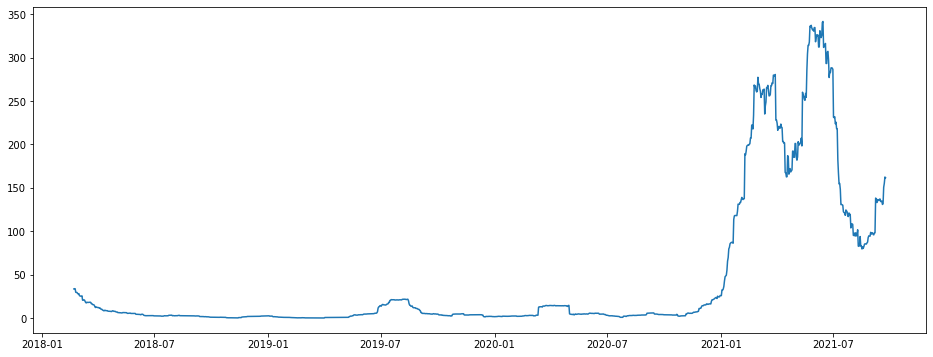

In [33]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(residuals.index, residuals.rolling(50).var());

If we look at the rolling standard deviation of our errors, we can see that the performance of the model varies at different points in time.

This is the result of the trends in the data.

Let's check how the differenced data would look like.

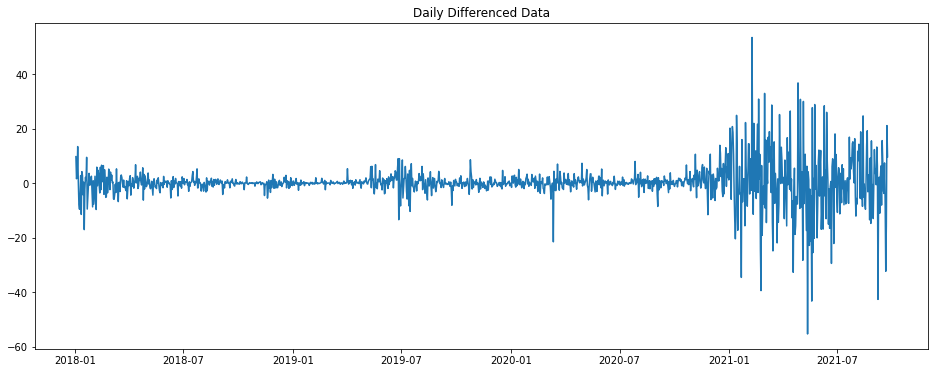

In [34]:
fig, ax = plt.subplots(figsize=(16,6))
train_bitcoin_diff = train_bitcoin.diff()
ax.plot(train_bitcoin_diff)
ax.set_title('Daily Differenced Data');

In [35]:
def stationarity_check(DF):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = DF.rolling(window=8, center=False).mean()
    roll_std = DF.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(DF) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(16,6))
    orig = plt.plot(DF, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None


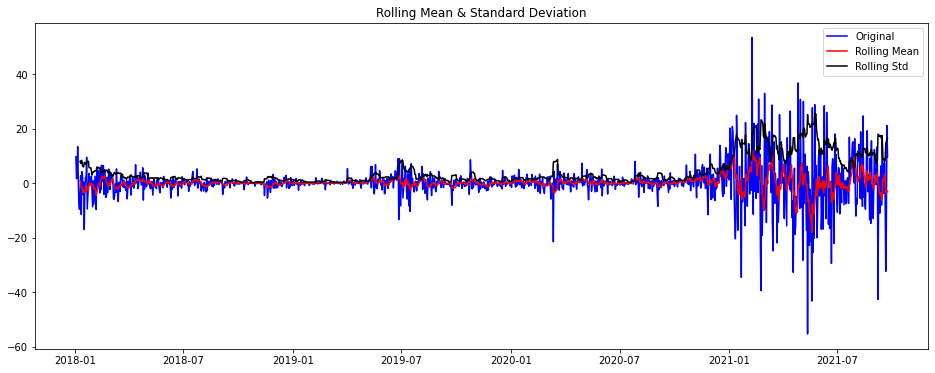

Results of Dickey-Fuller Test: 

Test Statistic                -7.436210e+00
p-value                        6.173812e-11
#Lags Used                     2.300000e+01
Number of Observations Used    1.337000e+03
Critical Value (1%)           -3.435250e+00
Critical Value (5%)           -2.863704e+00
Critical Value (10%)          -2.567922e+00
dtype: float64


In [36]:
stationarity_check(train_bitcoin_diff.dropna())

In [37]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
random_walk_bitcoin = ARIMA(train_bitcoin, order=(0,1,0)).fit()
y_hat_rw = random_walk_bitcoin.predict(typ='levels')
y_hat_rw

2018-01-01      0.000000
2018-01-02    100.000000
2018-01-03    109.701106
2018-01-04    111.303926
2018-01-05    114.219606
                 ...    
2021-09-19    353.501176
2021-09-20    346.046174
2021-09-21    313.708521
2021-09-22    297.964994
2021-09-23    319.058864
Freq: D, Name: predicted_mean, Length: 1362, dtype: float64

In [38]:
random_walk_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1362
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4531.626
Date:                Wed, 31 Aug 2022   AIC                           9065.253
Time:                        21:34:39   BIC                           9070.469
Sample:                    01-01-2018   HQIC                          9067.205
                         - 09-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        45.6685      0.606     75.320      0.000      44.480      46.857
===================================================================================
Ljung-Box (L1) (Q):                   5.55   Jarque-Bera (JB):             12308.07
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              19.20   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
# Check the RMSE
np.sqrt(mean_squared_error(train_bitcoin, y_hat_rw))

7.278456616725984

In [40]:
train_bitcoin_with_ind = train_bitcoin.reset_index()
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(0,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

14.101397632552361
37.31032200372842
10.001380182355547
91.18734595374815
65.61416956022595


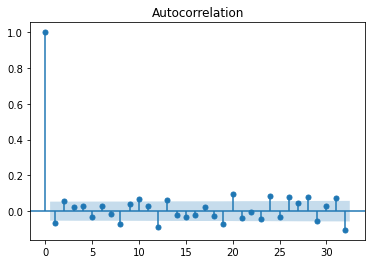

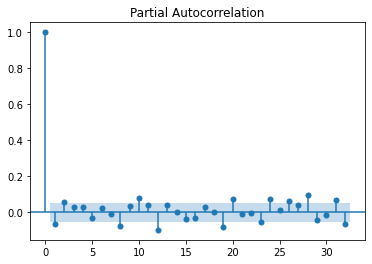

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train_bitcoin_diff.dropna())
plot_pacf(train_bitcoin_diff.dropna());

AR model might be investigated first with lag length selected from the PACF or via empirical investigation. In our case, it's clearly that within 1 lag the AR is significant. Which means, we can use AR = 1. 

The series show negative significant correlation at lag 1 as well, which suggests adding MA term equal to 1.

In [42]:
ar_1_bitcoin = ARIMA(train_bitcoin, order=(1,1,0)).fit()
y_hat_ar1 = ar_1_bitcoin.predict(typ='levels')
y_hat_ar1

2018-01-01      0.000000
2018-01-02     99.999711
2018-01-03    109.086996
2018-01-04    111.202463
2018-01-05    114.035034
                 ...    
2021-09-19    353.032635
2021-09-20    346.518099
2021-09-21    315.755594
2021-09-22    298.961608
2021-09-23    317.723557
Freq: D, Name: predicted_mean, Length: 1362, dtype: float64

In [43]:
ar_1_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1362
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4528.900
Date:                Wed, 31 Aug 2022   AIC                           9061.800
Time:                        21:34:50   BIC                           9072.232
Sample:                    01-01-2018   HQIC                          9065.705
                         - 09-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0633      0.016     -4.026      0.000      -0.094      -0.032
sigma2        45.4845      0.610     74.576      0.000      44.289      46.680
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             12124.76
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              19.01   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_ar1))

7.265920124158692

In [45]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(1,1,0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

14.111446172369646
37.309481784407076
9.998160015754193
91.16855821724748
65.64995264021964


In [46]:
ma_1_bitcoin = ARIMA(train_bitcoin, order=(0,1,1)).fit()
y_hat_ma1 = ma_1_bitcoin.predict(typ='levels')
y_hat_ma1

2018-01-01      0.000000
2018-01-02     99.999742
2018-01-03    109.152560
2018-01-04    111.181891
2018-01-05    114.047291
                 ...    
2021-09-19    353.093911
2021-09-20    346.445957
2021-09-21    315.565554
2021-09-22    298.963387
2021-09-23    317.918947
Freq: D, Name: predicted_mean, Length: 1362, dtype: float64

In [47]:
ma_1_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1362
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4529.181
Date:                Wed, 31 Aug 2022   AIC                           9062.362
Time:                        21:34:58   BIC                           9072.794
Sample:                    01-01-2018   HQIC                          9066.267
                         - 09-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0567      0.016     -3.593      0.000      -0.088      -0.026
sigma2        45.5035      0.608     74.808      0.000      44.311      46.696
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             12174.05
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              19.03   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_ma1))

7.2672105465095145

In [49]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(0,1,1)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

14.1108088044134
37.309588227383244
9.998469349292149
91.16850422830395
65.64536222622318


In [50]:
arma_model_bitcoin = ARIMA(train_bitcoin, order=(1,1,1)).fit()
y_hat_train = arma_model_bitcoin.predict(typ='levels')
y_hat_train

2018-01-01      0.000000
2018-01-02     99.999698
2018-01-03    109.059065
2018-01-04    111.516911
2018-01-05    113.929579
                 ...    
2021-09-19    352.943004
2021-09-20    346.793276
2021-09-21    315.389487
2021-09-22    298.134893
2021-09-23    317.638814
Freq: D, Name: predicted_mean, Length: 1362, dtype: float64

In [51]:
arma_model_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1362
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4527.687
Date:                Wed, 31 Aug 2022   AIC                           9061.374
Time:                        21:35:04   BIC                           9077.022
Sample:                    01-01-2018   HQIC                          9067.232
                         - 09-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5557      0.142     -3.917      0.000      -0.834      -0.278
ma.L1          0.4923      0.151      3.264      0.001       0.197       0.788
sigma2        45.4034      0.614     73.980      0.000      44.200      46.606
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             11997.72
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              18.92   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
np.sqrt(mean_squared_error(train_bitcoin, y_hat_train))

7.260350277513463

In [53]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(1,1,1)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

14.11612863662943
37.29453904039557
10.044727769512447
91.17056341745077
284.0962236240581


In [76]:
import itertools
p = range(0, 11)
q = range(0, 11)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, [1], q))
ans = []
for comb in pdq:
    try:
        mod = ARIMA(train_bitcoin,
                    order=comb)

        output = mod.fit()
        ans.append([comb, output.aic])
    except:
        continue
            
ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq    (8, 1, 7)
aic      8990.87
Name: 95, dtype: object

In [90]:
arma_bitcoin = ARIMA(train_bitcoin, order=(8,1,7)).fit()
yhat_train = arma_bitcoin.predict(typ='levels')
yhat_train

2018-01-01      0.000000
2018-01-02     99.999657
2018-01-03    108.998609
2018-01-04    111.327941
2018-01-05    114.378745
                 ...    
2021-09-19    352.565048
2021-09-20    346.527665
2021-09-21    315.882374
2021-09-22    297.985113
2021-09-23    313.858638
Freq: D, Name: predicted_mean, Length: 1362, dtype: float64

In [91]:
arma_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Close Bitcoin   No. Observations:                 1362
Model:                 ARIMA(8, 1, 7)   Log Likelihood               -4479.435
Date:                Wed, 31 Aug 2022   AIC                           8990.869
Time:                        21:50:42   BIC                           9074.325
Sample:                    01-01-2018   HQIC                          9022.111
                         - 09-23-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5535      0.046    -12.135      0.000      -0.643      -0.464
ar.L2         -0.3043      0.056     -5.460      0.000      -0.413      -0.195
ar.L3         -0.3588      0.056     -6.456      0.000      -0.468      -0.250
ar.L4          0.4553      0.051      8.928      0.000       0.355       0.555
ar.L5          0.3077      0.045      6.846      0.000       0.220       0.396
ar.L6          0.4919      0.044     11.185      0.000       0.406       0.578
ar.L7          0.8326      0.034     24.593      0.000       0.766       0.899
ar.L8         -0.0552      0.020     -2.723      0.006      -0.095      -0.015
ma.L1          0.5063      0.043     11.806      0.000       0.422       0.590
ma.L2          0.3345      0.053      6.360      0.000       0.231       0.438
ma.L3          0.3892      0.056      6.960      0.000       0.280       0.499
ma.L4         -0.4422      0.053     -8.393      0.000      -0.545      -0.339
ma.L5         -0.2625      0.051     -5.099      0.000      -0.363      -0.162
ma.L6         -0.4354      0.049     -8.941      0.000      -0.531      -0.340
ma.L7         -0.8395      0.033    -25.388      0.000      -0.904      -0.775
sigma2        43.5982      0.714     61.033      0.000      42.198      44.998
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):              8657.90
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):              17.17   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
np.sqrt(mean_squared_error(train_bitcoin, yhat_train))

7.040725970704615

In [57]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    ar = ARIMA(endog = train_bitcoin_with_ind.iloc[train_ind, -1], order=(8,1,7)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

16.077611002334482
37.45378526385388
9.919435994699738
90.99620994978713
67.05911596635869


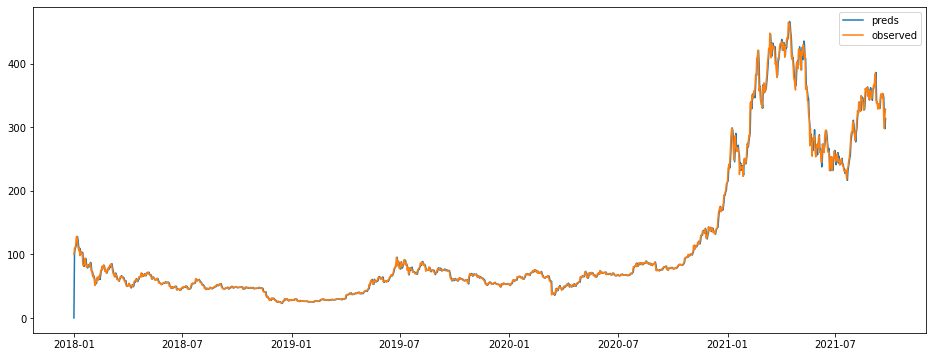

In [94]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(yhat_train, label='preds')
ax.plot(train_bitcoin, label='observed')
plt.legend()
plt.show();

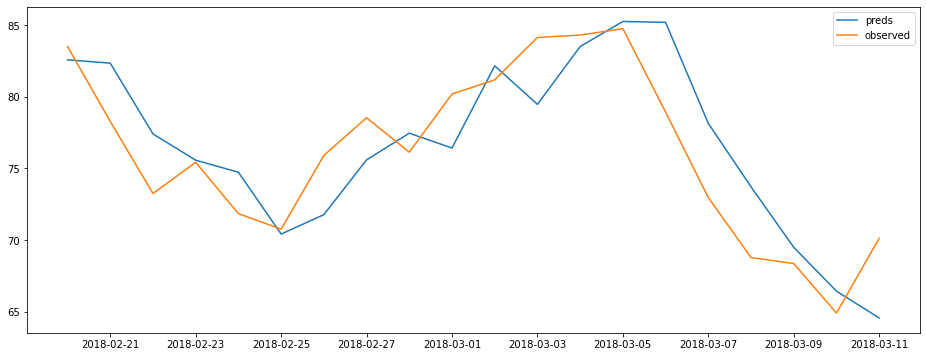

In [95]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(yhat_train[50:70], label='preds')
ax.plot(train_bitcoin[50:70], label='observed')
plt.legend()
plt.show();

In [58]:
print(random_walk_bitcoin.aic)
print(ar_1_bitcoin.aic)
print(ma_1_bitcoin.aic)
print(arma_model_bitcoin.aic)
print(arma_bitcoin.aic)

9065.252767284186
9061.799552522474
9062.361867870452
9061.374034014914
8990.869162312692


In [59]:
def find_rmse(model, train_data=train_bitcoin):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))

In [60]:
print(find_rmse(random_walk_bitcoin))
print(find_rmse(ar_1_bitcoin))
print(find_rmse(ma_1_bitcoin))
print(find_rmse(arma_model_bitcoin))
print(find_rmse(arma_bitcoin))

7.278456616725984
7.265920124158692
7.2672105465095145
7.260350277513463
7.040725970704615


In [61]:
test_bitcoin

Date
2021-09-24    313.678861
2021-09-25    312.777093
2021-09-26    316.379188
2021-09-27    309.256142
2021-09-28    300.460873
                 ...    
2022-08-26    148.346801
2022-08-27    146.748514
2022-08-28    143.637160
2022-08-29    148.624856
2022-08-30    144.955103
Name: Close Bitcoin, Length: 341, dtype: float64

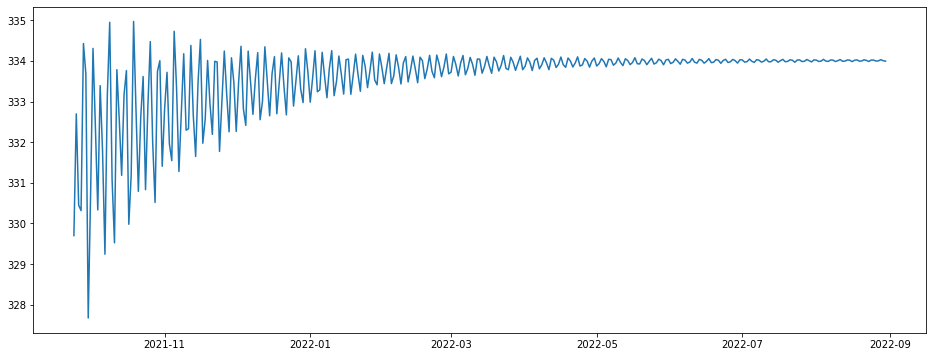

In [96]:
yhat_test = arma_bitcoin.predict(start=test_bitcoin.index[0], end=test_bitcoin.index[-1], typ='levels')
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(yhat_test);

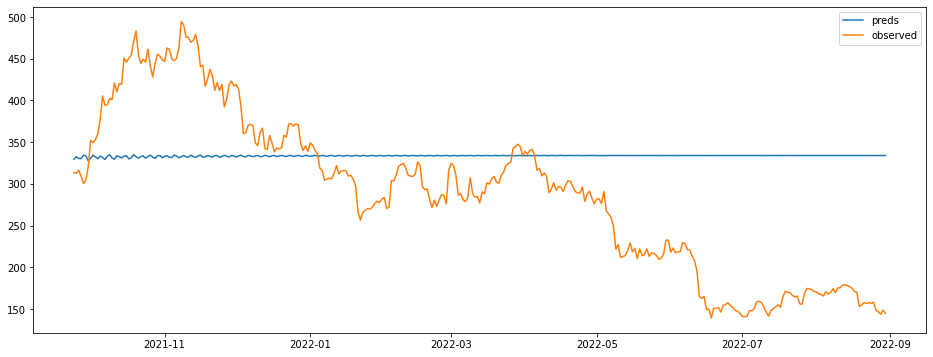

In [97]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(yhat_test, label='preds')
ax.plot(test_bitcoin, label='observed')
plt.legend();

In [98]:
np.sqrt(mean_squared_error(test_bitcoin, yhat_test))

106.03117317223675

The predictions on the test set certainly leave something to be desired. Let's look at the autocorrelation of the original series.

In [101]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, [1], q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, [1], q))]

In [ ]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = SARIMAX(train_bitcoin,
                          order=comb,
                          seasonal_order=combs,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
        except:
            continue
            
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

In [75]:
sari_bitcoin = SARIMAX(train_bitcoin, 
                       order=(2, 1, 2), 
                       seasonal_order=(2, 1, 1, 7), 
                       enforce_stationarity=False, 
                       enforce_invertibility=False).fit()

In [76]:
sari_bitcoin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                     Close Bitcoin   No. Observations:                 1362
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 9)   Log Likelihood               -4442.533
Date:                           Wed, 31 Aug 2022   AIC                           8899.066
Time:                                   21:43:37   BIC                           8935.422
Sample:                               01-01-2018   HQIC                          8912.691
                                    - 09-23-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0747      0.016     -4.566      0.000      -0.107      -0.043
ma.L2          0.0712      0.014      4.960      0.000       0.043       0.099
ar.S.L9       -0.5477      0.111     -4.940      0.000      -0.765      -0.330
ar.S.L18      -0.0418      0.018     -2.329      0.020      -0.077      -0.007
ma.S.L9       -0.3991      7.574     -0.053      0.958     -15.243      14.445
ma.S.L18      -0.6009      4.548     -0.132      0.895      -9.515       8.313
sigma2        45.0661    341.192      0.132      0.895    -623.657     713.789
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11040.36
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              28.71   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    sarimax = SARIMAX(endog = train_bitcoin_with_ind.iloc[train_ind, -1],
                      order=(0,1,2),
                      seasonal_order=(2,1,2,9),
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit()
    preds = sarimax.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

13.637979058097129
52.14798020195509
11.273813625665513
89.80612444388032
182.1350564193993


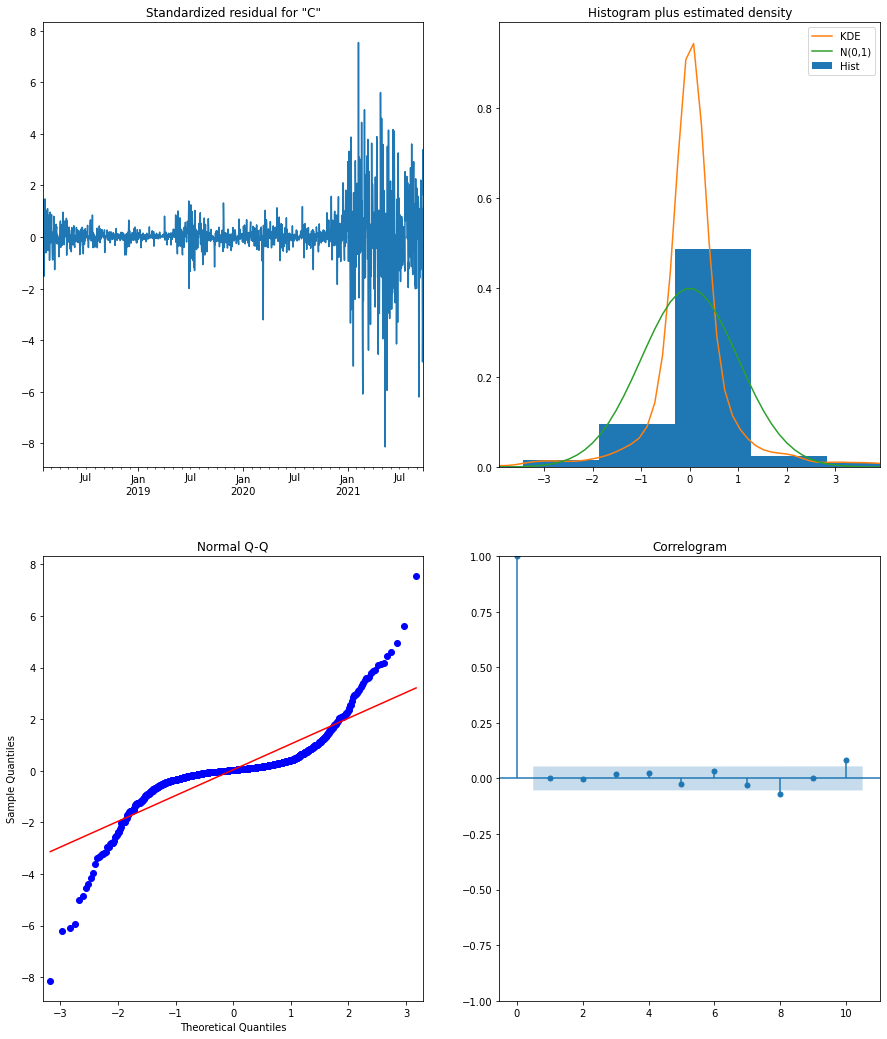

In [78]:
sari_bitcoin.plot_diagnostics(figsize=(15, 18))
plt.show()

In order to move forward, the residuals should remain uncorrelated and normally distributed having zero mean. According to the plots, we have the absence of these assumptions because:

1) The residual errors seem to fluctuate around a mean of zero without having a uniform variance.

2) Most of the dots do not fall in line with the red line. These significant deviations prove the skewed distribution.


In [79]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log)
train_bitcoin_log = transformer.fit_transform(train_bitcoin)
train_bitcoin_log.head()

Date
2018-01-01    4.605170
2018-01-02    4.697759
2018-01-03    4.712265
2018-01-04    4.738123
2018-01-05    4.849067
Name: Close Bitcoin, dtype: float64

In [80]:
test_bitcoin_log = transformer.transform(test_bitcoin)
test_bitcoin_log.head()

Date
2021-09-24    5.748370
2021-09-25    5.745491
2021-09-26    5.756941
2021-09-27    5.734170
2021-09-28    5.705318
Name: Close Bitcoin, dtype: float64

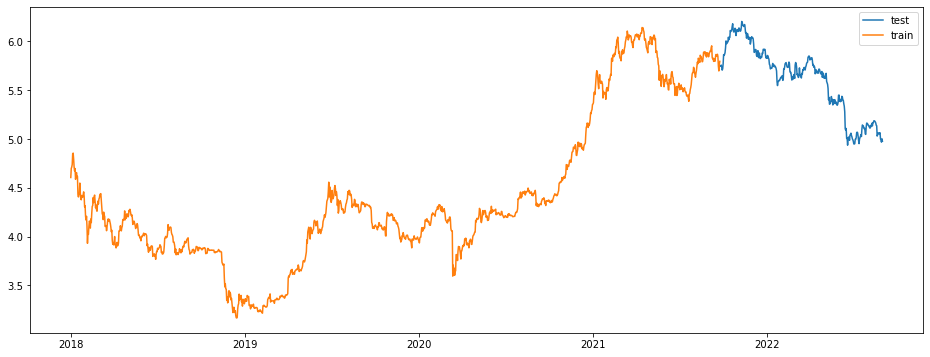

In [81]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(test_bitcoin_log, label='test')
ax.plot(train_bitcoin_log, label='train')
plt.legend();

In [82]:
sari_bitcoin_2 = SARIMAX(train_bitcoin_log, 
                         order=(0, 1, 2), 
                         seasonal_order=(2, 1, 2, 9), 
                         enforce_stationarity=False, 
                         enforce_invertibility=False).fit()

In [83]:
sari_bitcoin_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                     Close Bitcoin   No. Observations:                 1362
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 9)   Log Likelihood                2377.037
Date:                           Wed, 31 Aug 2022   AIC                          -4740.075
Time:                                   21:44:51   BIC                          -4703.719
Sample:                               01-01-2018   HQIC                         -4726.450
                                    - 09-23-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0670      0.022     -3.011      0.003      -0.111      -0.023
ma.L2          0.0588      0.025      2.321      0.020       0.009       0.108
ar.S.L9       -0.4590      0.086     -5.307      0.000      -0.629      -0.289
ar.S.L18      -0.0519      0.024     -2.125      0.034      -0.100      -0.004
ma.S.L9       -0.5717      0.090     -6.348      0.000      -0.748      -0.395
ma.S.L18      -0.4427      0.090     -4.935      0.000      -0.618      -0.267
sigma2         0.0016   3.32e-05     47.541      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             14357.75
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -1.22
Prob(H) (two-sided):                  0.45   Kurtosis:                        18.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
train_bitcoin_with_ind = train_bitcoin_log.reset_index()
for train_ind, val_ind in split.split(train_bitcoin_with_ind):
    sarimax = SARIMAX(endog = train_bitcoin_with_ind.iloc[train_ind, -1],
                      order=(0,1,2),
                      seasonal_order=(2,1,2,9),
                      enforce_stationarity=False,
                      enforce_invertibility=False).fit()
    preds = sarimax.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_bitcoin_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

0.15629203624299393
1.0792167494032678
0.21566075285516062
0.669557465946535
0.5848483410575764


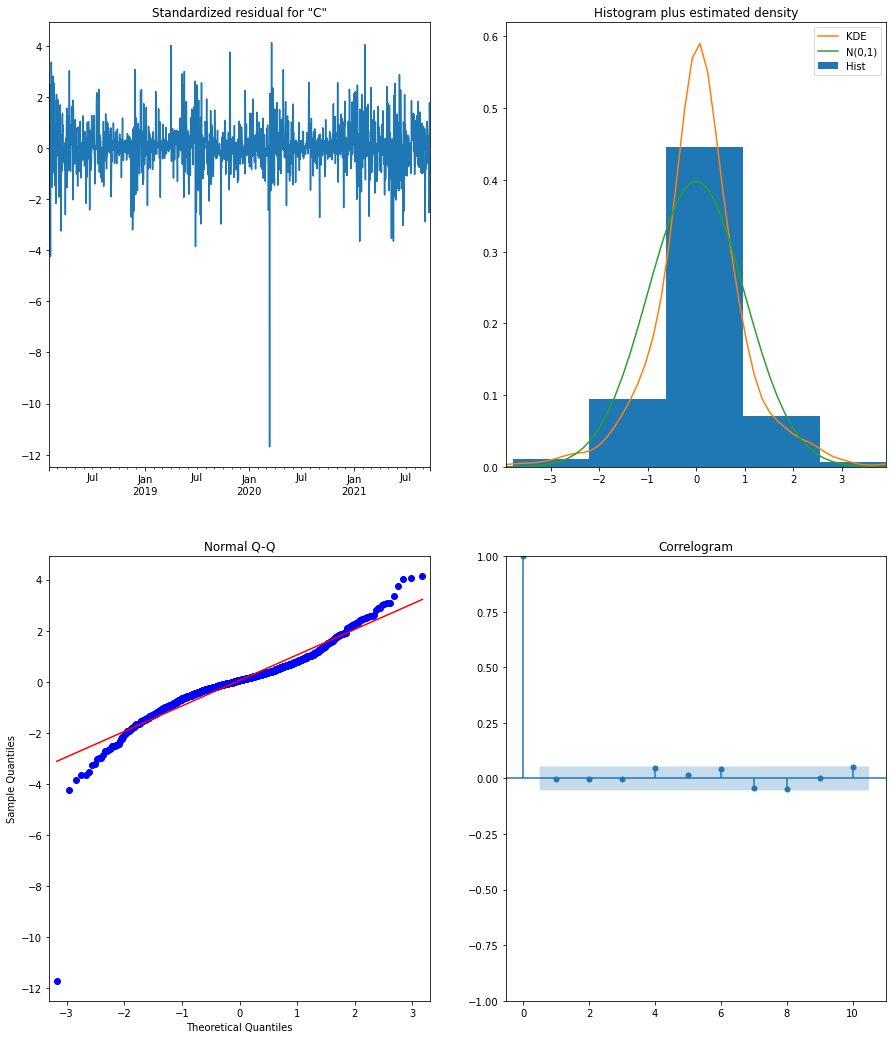

In [85]:
sari_bitcoin_2.plot_diagnostics(figsize=(15, 18))
plt.show()

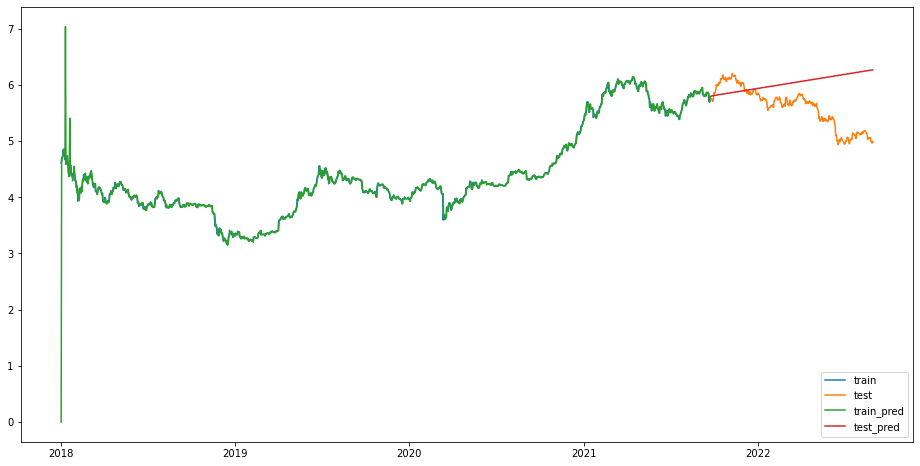

In [86]:
y_hat_train = sari_bitcoin_2.predict(typ='levels')
y_hat_test = sari_bitcoin_2.predict(start=test_bitcoin_log.index[0], end=test_bitcoin_log.index[-1], typ='levels')
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(train_bitcoin_log, label='train')
ax.plot(test_bitcoin_log, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')
plt.legend();

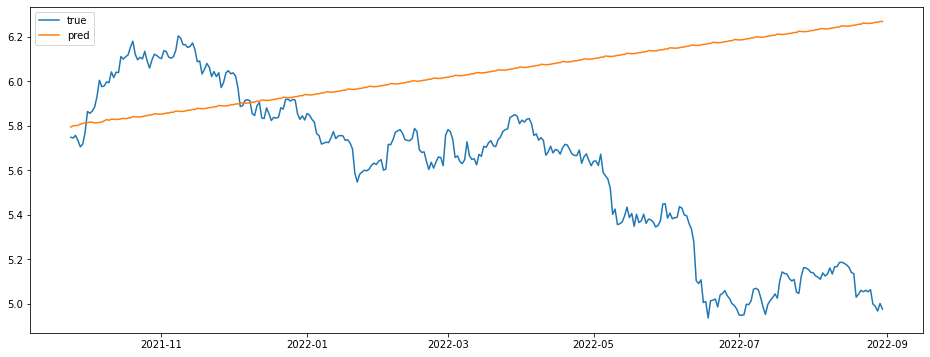

In [87]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(test_bitcoin_log, label='true')
ax.plot(y_hat_test, label='pred')
plt.legend();

In [92]:
np.sqrt(mean_squared_error(test_bitcoin_log, y_hat_test))

0.6641018228950759

In [93]:
sari_bitcoin_pred = SARIMAX(bitcoin_normalized, 
                            order=(1, 1, 1), 
                            seasonal_order=(0, 1, 1, 30), 
                            enforce_stationarity=False, 
                            enforce_invertibility=False).fit()

In [94]:
prediction = sari_bitcoin_pred.get_forecast(steps=120)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

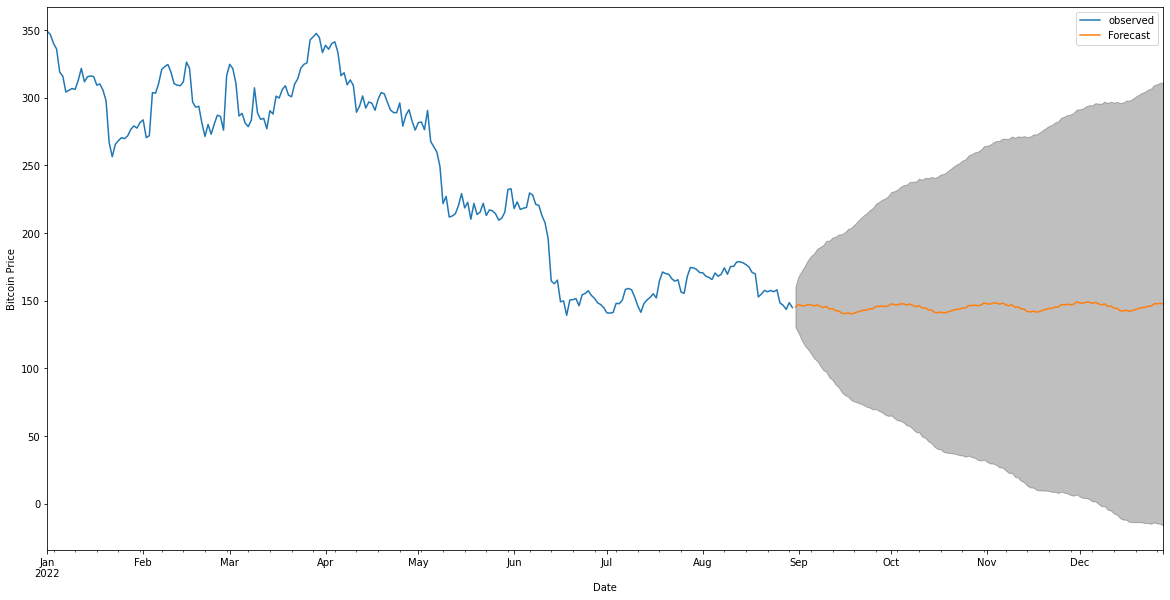

In [95]:
ax = bitcoin_normalized['2022':].plot(label='observed', figsize=(20, 10))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Price')

plt.legend()
plt.show()

In [99]:
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from prophet import Prophet


ImportError: cannot import name 'lag_baomer' from 'convertdate.holidays' (/Users/olga/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/convertdate/holidays.py)

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
values_train = train_bitcoin.values
values_train = values_train.reshape(len(values_train), 1)
scaler.fit(values_train)
train_bitcoin_scaled = pd.DataFrame(
    scaler.transform(values_train),
    index=train_bitcoin.index
)

train_bitcoin_scaled.head()

,0
Date,
2018-01-01,0.172905
2018-01-02,0.194889
2018-01-03,0.198522
2018-01-04,0.205129
2018-01-05,0.235499


In [93]:
values_test = test_bitcoin.values
values_test = values_test.reshape(len(values_test), 1)

test_bitcoin_scaled = pd.DataFrame(
    scaler.transform(values_test), 
    index=test_bitcoin.index
)
test_bitcoin_scaled.head()

,0
Date,
2021-09-22,0.669321
2021-09-23,0.691233
2021-09-24,0.657129
2021-09-25,0.655085
2021-09-26,0.663248


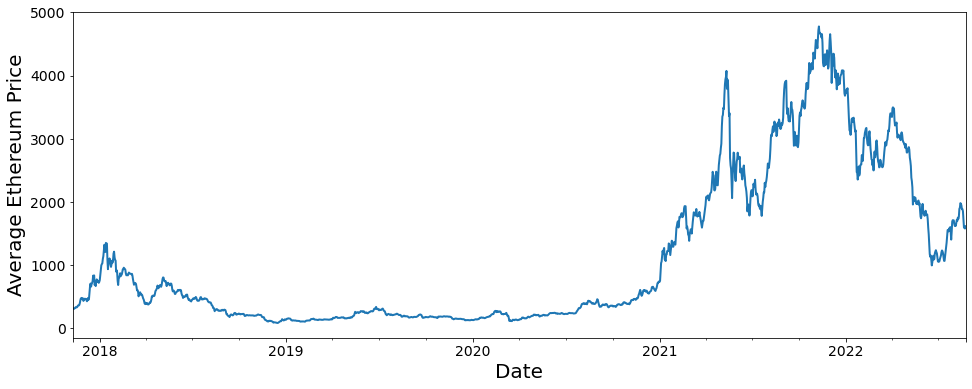

In [120]:
df['Average Price Ethereum'].plot(figsize=(16,6), linewidth=2, fontsize=14)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Average Ethereum Price', fontsize=20);

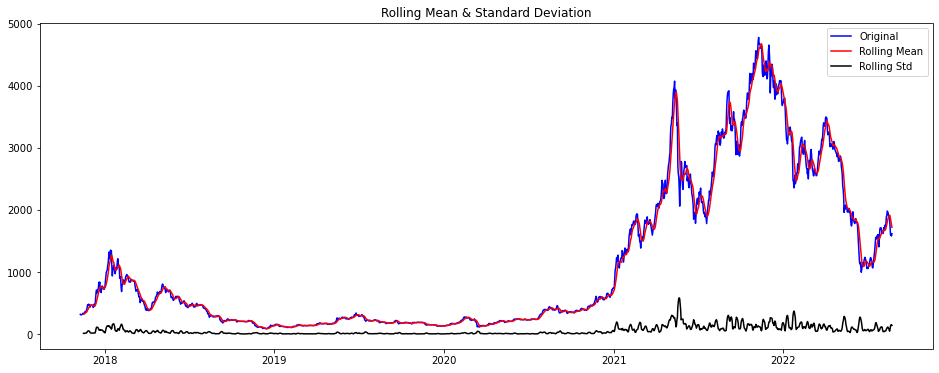

Results of Dickey-Fuller Test: 

Test Statistic                   -1.394762
p-value                           0.584785
#Lags Used                        8.000000
Number of Observations Used    1740.000000
Critical Value (1%)              -3.434114
Critical Value (5%)              -2.863202
Critical Value (10%)             -2.567655
dtype: float64


In [128]:
stationarity_check(df['Average Price Ethereum'])

 not stationary

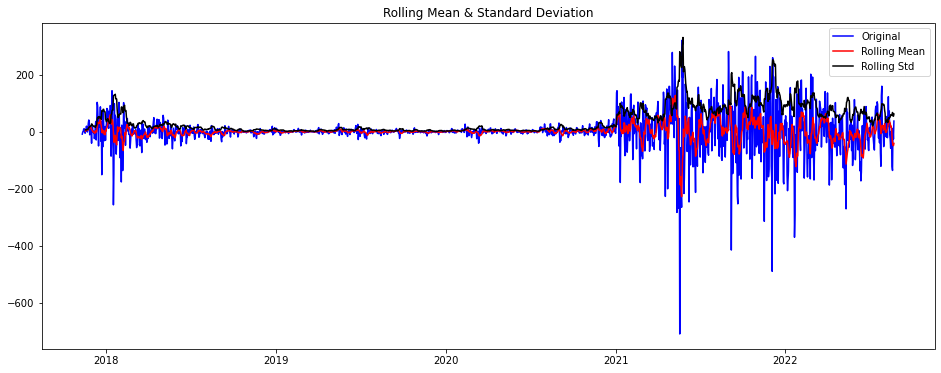

Results of Dickey-Fuller Test: 

Test Statistic                -7.382072e+00
p-value                        8.421422e-11
#Lags Used                     2.500000e+01
Number of Observations Used    1.722000e+03
Critical Value (1%)           -3.434153e+00
Critical Value (5%)           -2.863220e+00
Critical Value (10%)          -2.567664e+00
dtype: float64


In [129]:
ethereum_diff = df['Average Price Ethereum'].diff(periods=1)
ethereum_diff.dropna(inplace=True)
stationarity_check(ethereum_diff)

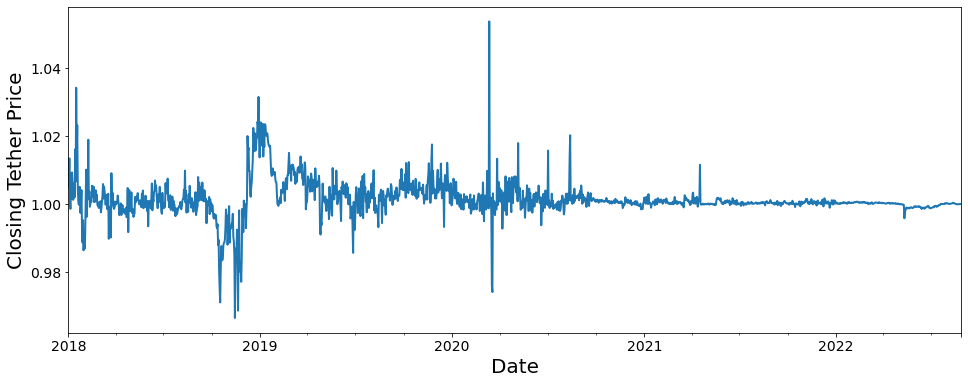

In [115]:
df['Close Tether'].plot(figsize=(16,6), linewidth=2, fontsize=14)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Closing Tether Price', fontsize=20);

In [7]:
year_groups = tether_df.groupby(pd.Grouper(freq ='A'))
# Create a new DataFrame and store yearly values in columns 
tether_annual = pd.DataFrame()

for yr, group in year_groups:
    tether_annual[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
tether_annual.plot(figsize = (13,8), subplots=True, legend=True);

ValueError: Length of values (365) does not match length of index (53)

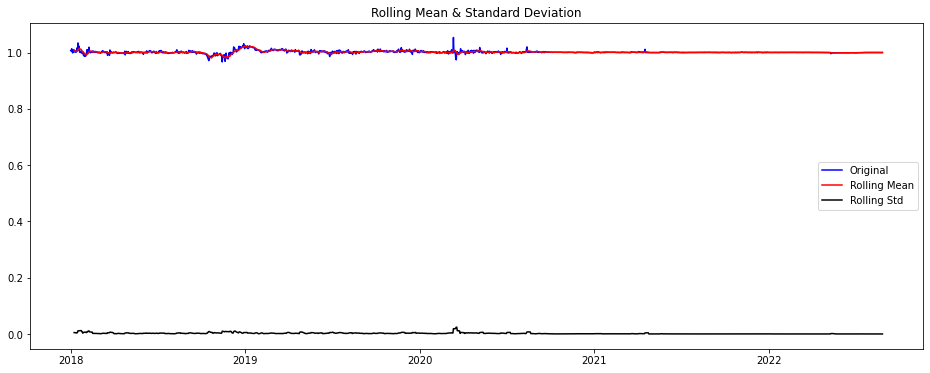

Results of Dickey-Fuller Test: 

Test Statistic                -6.102470e+00
p-value                        9.760752e-08
#Lags Used                     6.000000e+00
Number of Observations Used    1.693000e+03
Critical Value (1%)           -3.434218e+00
Critical Value (5%)           -2.863249e+00
Critical Value (10%)          -2.567680e+00
dtype: float64


In [117]:
stationarity_check(df['Close Tether'])

Tether is stationary (test statistic is less than critical value)

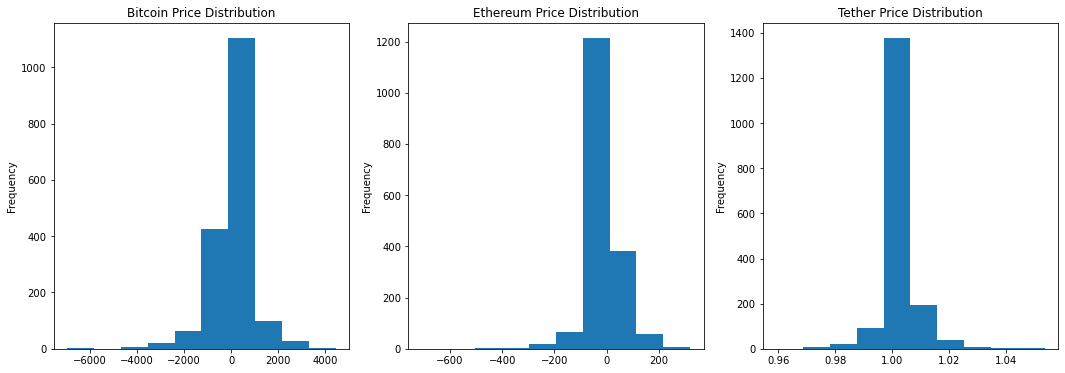

In [132]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
bitcoin_diff.plot(kind='hist', ax=axes[0])
axes[0].set_title('Bitcoin Price Distribution')
ethereum_diff.plot(kind='hist', ax=axes[1])
axes[1].set_title('Ethereum Price Distribution')
df['Average Price Tether'].plot(kind='hist', ax=axes[2])
axes[2].set_title('Tether Price Distribution');

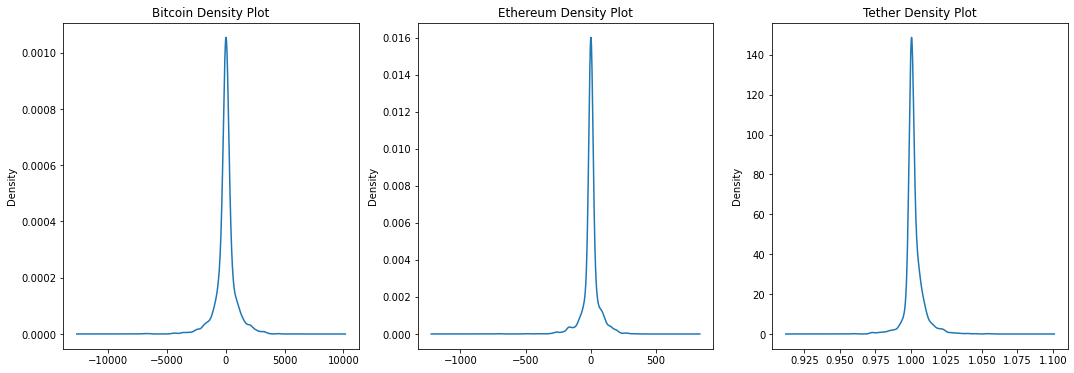

In [133]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18,6))
bitcoin_diff.plot(kind='kde', ax=axes[0])
axes[0].set_title('Bitcoin Density Plot')
ethereum_diff.plot(kind='kde', ax=axes[1])
axes[1].set_title('Ethereum Density Plot')
df['Average Price Tether'].plot(kind='kde', ax=axes[2])
axes[2].set_title('Tether Density Plot');

Nothing is white noise process since mean and std are not constant over time

In [137]:
bitcoin = pd.DataFrame(bitcoin_diff)
ethereum = pd.DataFrame(ethereum_diff)
final_df = bitcoin.join(
    ethereum, how='outer', rsuffix=' Ethereum').join(
    df['Average Price Tether'], how='outer', rsuffix=' Tether')
final_df.dropna(inplace=True)
final_df

,Average Price Bitcoin,Average Price Ethereum,Average Price Tether
Date,,,
2017-11-10,-399.739990,-8.624009,1.009858
2017-11-11,-335.750000,-0.807495,1.011005
2017-11-12,-466.655273,0.010513,1.036755
2017-11-13,255.710205,8.886994,1.002197
2017-11-14,285.625000,10.750000,1.005164
...,...,...,...
2022-08-19,-1329.636719,-122.450257,1.000061
2022-08-20,-937.311523,-135.958313,1.000053
2022-08-21,282.252930,11.732727,1.000052


In [138]:
final_df.corr()

,Average Price Bitcoin,Average Price Ethereum,Average Price Tether
Average Price Bitcoin,1.000000,0.754439,-0.001664
Average Price Ethereum,0.754439,1.000000,0.019570
Average Price Tether,-0.001664,0.019570,1.000000


The average price for ethereum and bitcoin are highly correlated

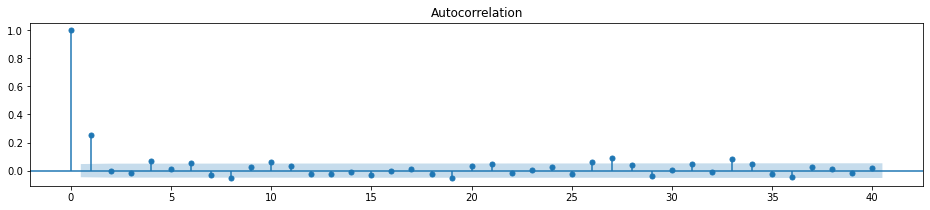

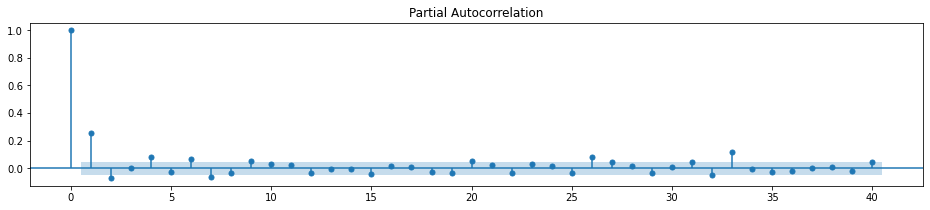

In [157]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(final_df['Average Price Bitcoin'], ax=ax, lags=40);
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(final_df['Average Price Bitcoin'], ax=ax, lags=40);

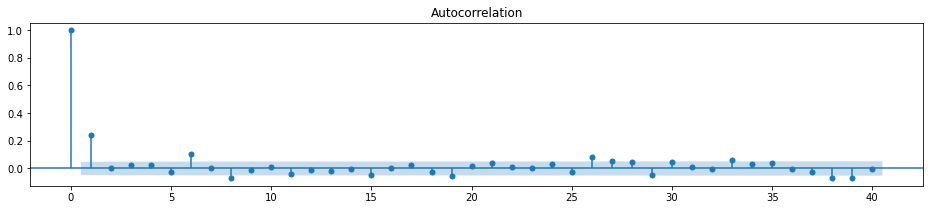

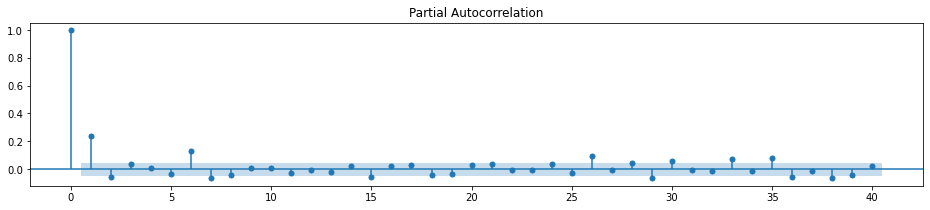

In [158]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(final_df['Average Price Ethereum'], ax=ax, lags=40);
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(final_df['Average Price Ethereum'], ax=ax, lags=40);

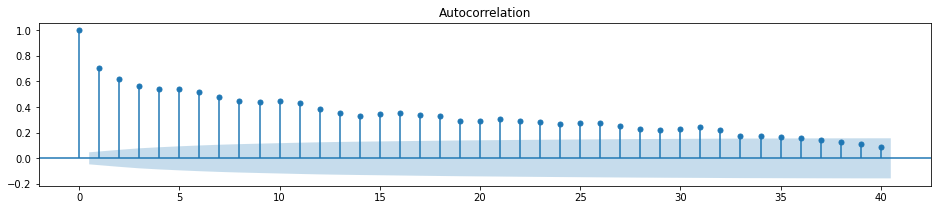

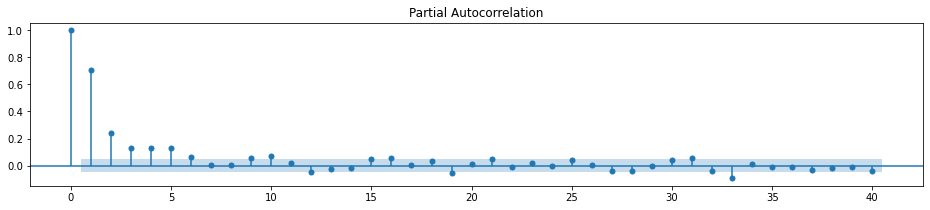

In [159]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(final_df['Average Price Tether'], ax=ax, lags=40);
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(final_df['Average Price Tether'], ax=ax, lags=40);